# Whoop! Whoop!

Phil 4:13 You did it!

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import tree
# import graphviz
from sklearn import metrics 

%matplotlib inline

In [116]:
pd.set_option('display.width', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 30)

In [117]:
raw = pd.read_csv('../train.csv')
working_df = raw
# raw.tail(10)
raw.shape

(1460, 81)

# Feature Engineeering

 ### Dealing with N/a 's
 List all of the columns that have N/a as an option

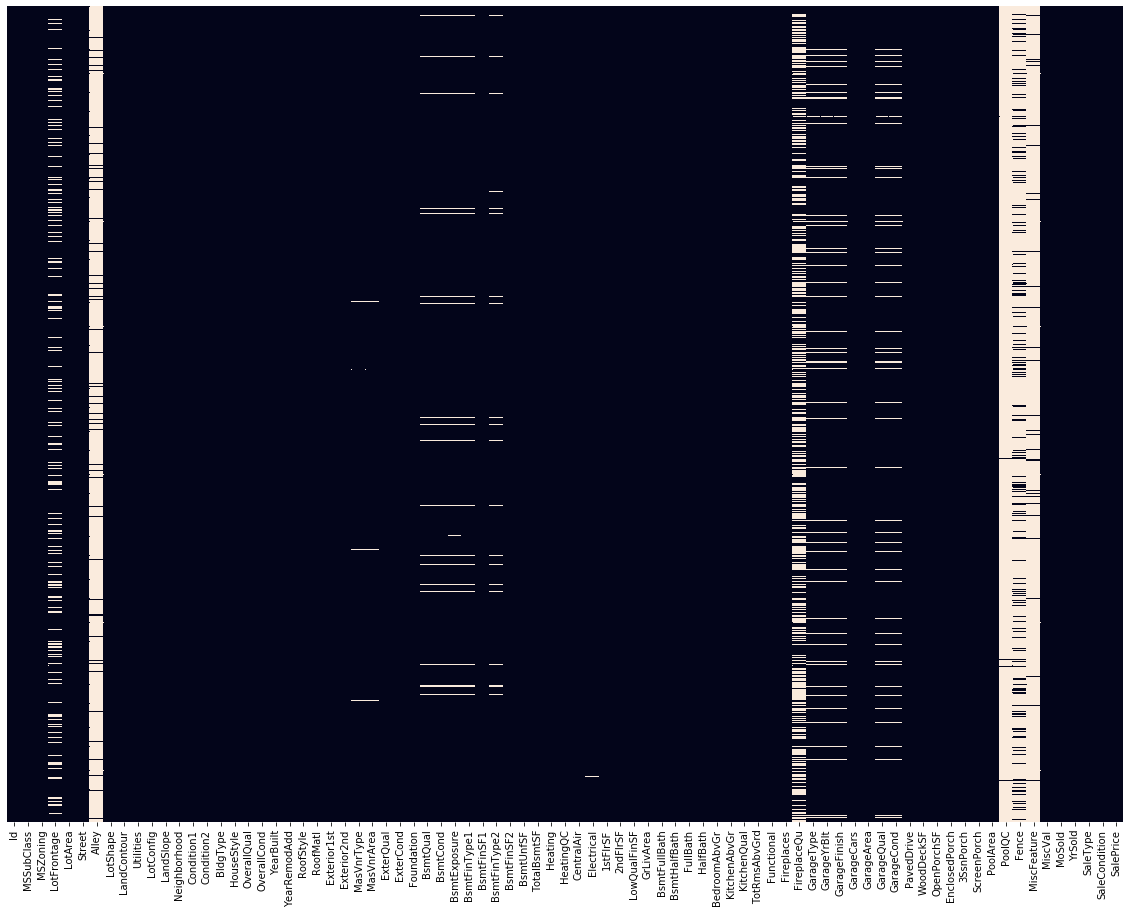

In [118]:
raw.isnull()
heatmap, ax2 = plt.subplots(figsize = (20,15))
# ax2=sns.heatmap(raw.isnull(),yticklabels=False,cbar=False,cmap='viridis') #cmap='YlGnBu
ax2=sns.heatmap(raw.isnull(),yticklabels=False,cbar=False)

## N/A COLUMN NAMES
* LotFrontage: Linear feet of street connected to property
* Alley 
    *  = No alley access
* MasVnrType: Masonry veneer type
    * 
* MasVnrArea
* BsmtQual
* BsmtCond
* BsmtExposure
* BsmtFinType1
* BsmtFinType2
* Electrical
* FireplaceQu
* GarageType
* GarageYrBlt
* GarageFinish
* GarageQual
* GarageCond
* PoolQC
* Fence
* MiscFeature

In [119]:
# Note:
# In each column the N/a means something different. To get the correct data meaning 
# we need to properly replace the N/a values with their corresponding meaning
# researching the column category (ie. Lot frontage) may be neccessary to find that desired cooresponding value

In [120]:
def fixNa(df):
    # correct mislabled NAs
    naMeanings = {
        "LotFrontage":0 ,"Alley": "notIncluded","MasVnrType": "notIncluded",
        "BsmtQual": "notIncluded","BsmtCond":"notIncluded",
        "BsmtExposure": "notIncluded","BsmtFinType1": "notIncluded",
        "BsmtFinType2": "notIncluded","FireplaceQu":"notIncluded",
        "GarageType": "notIncluded","GarageYrBlt": "notIncluded",
        "GarageFinish": "notIncluded","GarageQual": "notIncluded",
        "GarageCond": "notIncluded","PoolQC": "notIncluded",
        "Fence": "notIncluded","MiscFeature": "notIncluded"
    }
    
    for col in naMeanings:
        df[col].fillna(naMeanings[col], inplace=True)
    
    # remove actual NAs
    df.dropna(axis=0, inplace = True)

    return df

In [121]:
working_df = raw
def preprocessing(df):
    df = fixNa(df)
    return df

In [122]:
working_df = preprocessing(working_df)

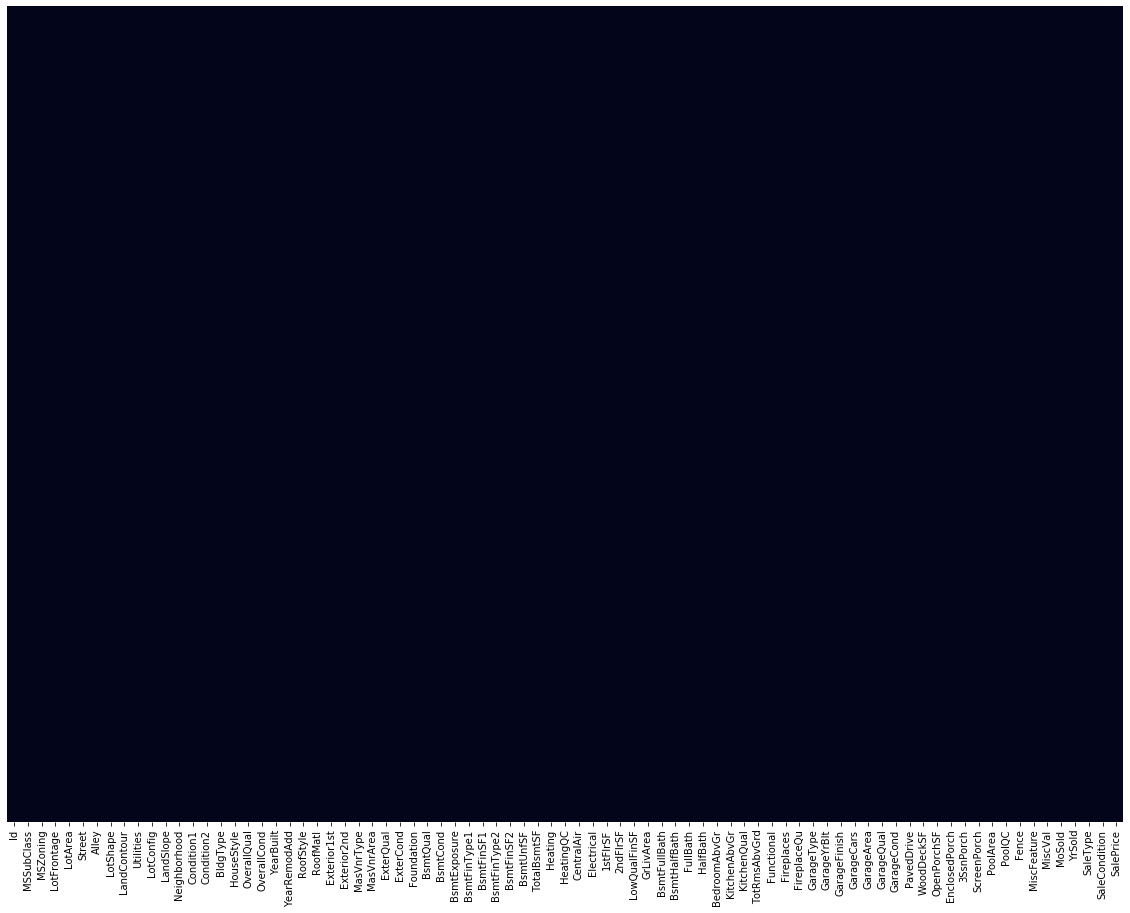

In [123]:
heatmap, ax2 = plt.subplots(figsize = (20,15))
# ax2=sns.heatmap(raw.isnull(),yticklabels=False,cbar=False,cmap='viridis') #cmap='YlGnBu
ax2=sns.heatmap(working_df.isnull(),yticklabels=False,cbar=False)

In [124]:
# Drop the missing values for these columns if the number of n/a's is less than 10
# "MasVnrArea", 
# raw.loc[raw["MasVnrType"]== 'none', "MasVnrArea" ]
# raw['MasVnrArea'].isna().sum()
working_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,notIncluded,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,notIncluded,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,notIncluded,notIncluded,notIncluded,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,notIncluded,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,notIncluded,notIncluded,notIncluded,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,notIncluded,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,notIncluded,notIncluded,notIncluded,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,notIncluded,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,notIncluded,notIncluded,notIncluded,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,notIncluded,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,notIncluded,notIncluded,notIncluded,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,notIncluded,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,notIncluded,notIncluded,notIncluded,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,notIncluded,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,notIncluded,MnPrv,notIncluded,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,notIncluded,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,notIncluded,GdPr

In [125]:
# now lets feature engeneer!
"""
Recap:
- all NAs have been removed but when i replaced empty lot frontage values with 0 we now kinda have a lot of outliers
-- instead of using 0 I'll ues the mean of that feature
What's next:
- graph a corrilation plot to get rid of the corrilated features
- Handle categorical features (there's a bunch but you got it)
--- ones with only 2 options use 1-hot encoding
--- ones with 3+ options use target encoding ...provided it doesnt need the target column 
- Normalize the data

- Split the data
- train the model
- test it!! and repeat
"""

"\nRecap:\n- all NAs have been removed but when i replaced empty lot frontage values with 0 we now kinda have a lot of outliers\n-- instead of using 0 I'll ues the mean of that feature\nWhat's next:\n- graph a corrilation plot to get rid of the corrilated features\n- Handle categorical features (there's a bunch but you got it)\n--- ones with only 2 options use 1-hot encoding\n--- ones with 3+ options use target encoding ...provided it doesnt need the target column \n- Normalize the data\n\n- Split the data\n- train the model\n- test it!! and repeat\n"

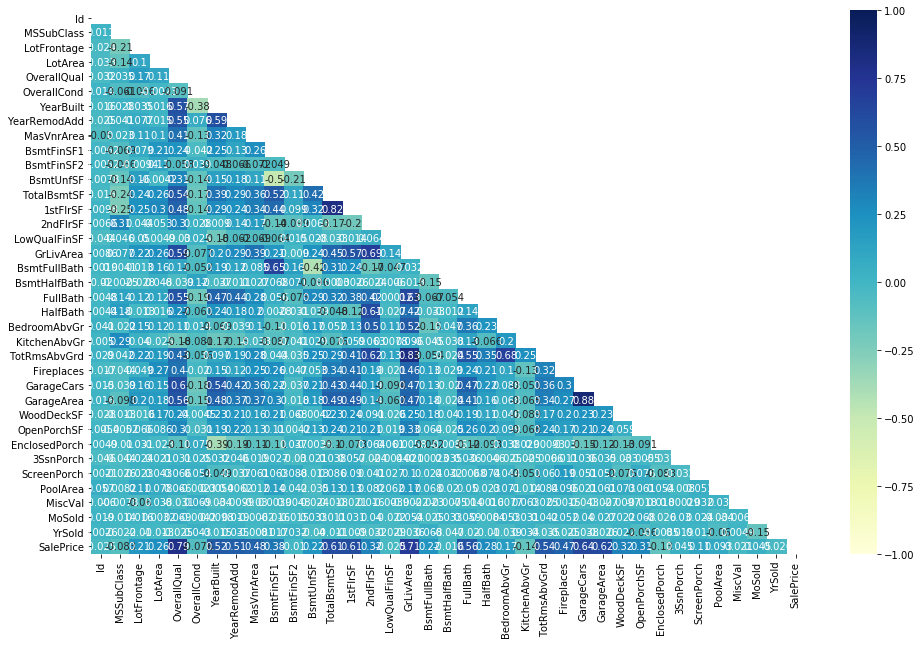

In [126]:
plt.figure(figsize=(16, 10))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(working_df.corr(), dtype=np.bool))
sns.heatmap(working_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='YlGnBu')


In [139]:
# return df with the top features to train model
def feature_selecting(df, target_value):
    #df of target correlation values
    target_corr = df.corr()[[target_value]].sort_values(by=target_value, ascending=False)

    # find features w/ corr value greater than/= to .5 w/ the target 
    top_feat = target_corr.loc[target_corr[target_value] >=-.3] 
    
    # find these important columns/features using the entire working data set
    ready_df = df[top_feat.index.tolist()]
    return ready_df

In [140]:
# # show me the features that are correlated with Target
target_value = "SalePrice"

# target_corr
top_features_df = feature_selecting(working_df, target_value)
top_features_df

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,BsmtFinSF1,WoodDeckSF,2ndFlrSF,OpenPorchSF,HalfBath,LotArea,BsmtFullBath,BsmtUnfSF,LotFrontage,BedroomAbvGr,ScreenPorch,PoolArea,3SsnPorch,MoSold,BsmtFinSF2,BsmtHalfBath,MiscVal,Id,LowQualFinSF,YrSold,OverallCond,MSSubClass,EnclosedPorch,KitchenAbvGr
0,208500,7,1710,2,548,856,856,2,8,2003,2003,196.0,0,706,0,854,61,1,8450,1,150,65.0,3,0,0,0,2,0,0,0,1,0,2008,5,60,0,1
1,181500,6,1262,2,460,1262,1262,2,6,1976,1976,0.0,1,978,298,0,0,0,9600,0,284,80.0,3,0,0,0,5,0,1,0,2,0,2007,8,20,0,1
2,223500,7,1786,2,608,920,920,2,6,2001,2002,162.0,1,486,0,866,42,1,11250,1,434,68.0,3,0,0,0,9,0,0,0,3,0,2008,5,60,0,1
3,140000,7,1717,3,642,756,961,1,7,1915,1970,0.0,1,216,0,756,35,0,9550,1,540,60.0,3,0,0,0,2,0,0,0,4,0,2006,5,70,272,1
4,250000,8,2198,3,836,1145,1145,2,9,2000,2000,350.0,1,655,192,1053,84,1,14260,1,490,84.0,4,0,0,0,12,0,0,0,5,0,2008,5,60,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,1647,2,460,953,953,2,7,1999,2000,0.0,1,0,0,694,40,1,7917,0,953,62.0,3,0,0,0,8,0,0,0,1456,0,2007,5,60,0,1
1456,210000,6,2073,2,500,1542,2073,2,7,1978,1988,119.0,2,790,349,0,0,0,13175,1,589,85.0,3,0,0,0,2,163,0,0,1457,0,2010,6,20,0,1
1457,266500,7,2340,1,252,1152,1188,2,9,1941,2006,0.0,2,275,0,1152,60,0,9042,0,877,66.0,4,0,0,0,5,0,0,2500,1458,0,2010,9,70,0,1
1458,142125,5,1078,1,240,1078,1078,1,5,1950,1996,0.0,0,49,366,0,0,0,9717,1,0,68.0,2,0,0,0,4,1029,0,0,1459,0,2010,6,20,112,1


In [141]:
y = top_features_df['SalePrice']
X = top_features_df.drop(columns=["SalePrice"]) 
# ready_df

In [142]:
X.shape
y.shape

(1451,)

In [143]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [144]:
from datetime import datetime
train_score = regressor.score(X, y) 

file1 = open("scoring.txt","a")#append mode
file1.write(str(tuple(["training ", datetime.now(),train_score]))+ "\n")
file1.close()


# regressor.coef_

# regressor.intercept_

